# 관심 있는 주제와 이유

주제: 날씨 변화(온도, 습도, 바람, 시간대)에 따른 전력 소모량 변화 분석

주제 선정 이유: 전력 수요 관리는 현대 사회에서 매우 중요한 문제이다. 특히, 에어컨이나 난방기 사용이 급증하는 여름과 겨울철에는 전력 수급 문제가 발생할 수 있으므로, 날씨 변화와 전력 소모량의 관계를 이해하는 것이 중요하다. 이러한 분석 결과는 전력 회사나 정책 기관에서 전력 공급 계획을 세우는 데 활용할 수 있으며, 전력 부족 사태를 예방하거나 효율적인 에너지 관리 전략을 수립하는 데 도움을 줄 수 있다. 또 시간대 변수를 날짜(년, 월, 일)와 시간(시, 분)으로 잘 나누어 분석하는 능력을 기릐고 싶다.

링크 : https://www.kaggle.com/datasets/ruchikakumbhar/power-consumption-prediction-dataset 
파일 명 : power consumption.csv

# 기본 패키지 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pip install koreanize-matplotlib
import koreanize_matplotlib

Note: you may need to restart the kernel to use updated packages.


# 타이타닉 데이터 불러오기

In [5]:
data = pd.read_csv("C:/Users/user/Desktop/baf/BAF-16-Fresh-Edu/Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* PassengerId : 승객 id
* Survived : 생존 유무, 0 = No, 1 = Yes
* Pclass : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd
* Name	
* Sex	
* Age	
* SibSp	: # of siblings / spouses aboard the Titanic	
* Parch	: # of parents / children aboard the Titanic	
* Ticket : Ticket number
* Fare : Passenger fare 요금
* Cabin	: Cabin number 객실 번호
* Embarked : Port of Embarkation 출항지

**생존자가 어떻게 분포해있는지를 중심으로 EDA**

# EDA

## 데이터의 구조

In [6]:
#원본 데이터 유지하기
df = data.copy(); df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.shape

(891, 12)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.info()
# Age, Cabin, Embarked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
data[data.duplicated()]  #중복행 없음 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [13]:
df.isnull().sum()
# Age, Cabin, Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

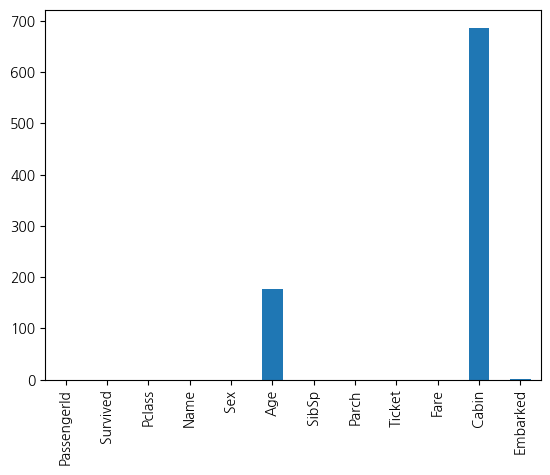

In [14]:
df.isnull().sum().plot.bar()

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
df.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


## 데이터 시각화

### 각 변수의 분포

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#### Survived

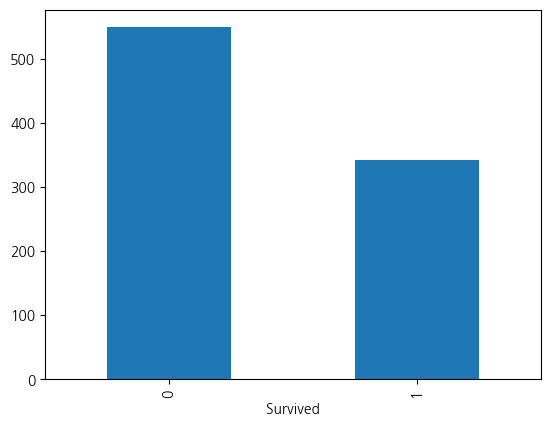

In [18]:
s = df["Survived"].value_counts()
s.plot.bar()
plt.show()

In [19]:
sn = df["Survived"].value_counts(normalize=True); sn
# 생존자와 희생자의 비율은 각각 약 38% 62%


Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

#### Pclass

In [20]:
df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [21]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [22]:
pclass = df["Pclass"].value_counts(); pclass

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

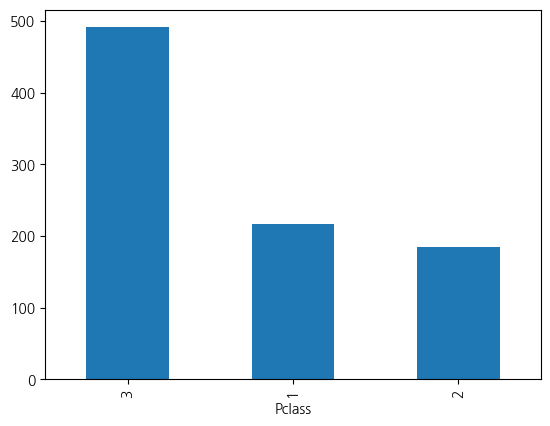

In [23]:
pclass.plot.bar()
# 3등석, 1등석, 2등석 순서로 많음.

#### Sex

In [24]:
df[["Sex"]].value_counts()

Sex   
male      577
female    314
Name: count, dtype: int64

In [25]:
df[["Sex"]].value_counts(normalize=True)

Sex   
male      0.647587
female    0.352413
Name: proportion, dtype: float64

#### Age

In [26]:
age = df["Age"].value_counts(); age
# age.plot.bar()

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [27]:
age = pd.DataFrame(age)
age

,count
Age,
24.00,30
22.00,27
18.00,26
19.00,25
28.00,25
...,...
36.50,1
55.50,1
0.92,1


In [28]:
age = age.sort_values(by='Age')
age

,count
Age,
0.42,1
0.67,1
0.75,2
0.83,2
0.92,1
...,...
70.00,2
70.50,1
71.00,2


<Axes: xlabel='Age'>

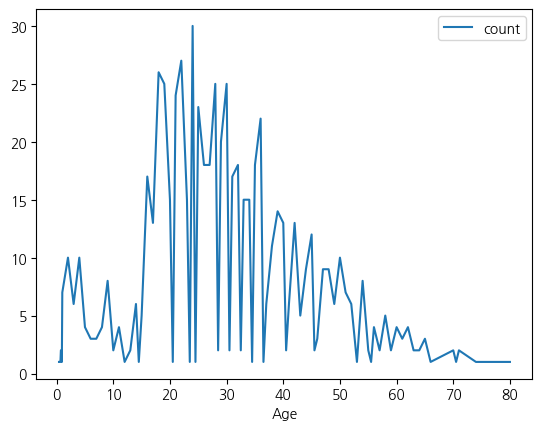

In [29]:
age.plot()
#연령대 분포

<Axes: >

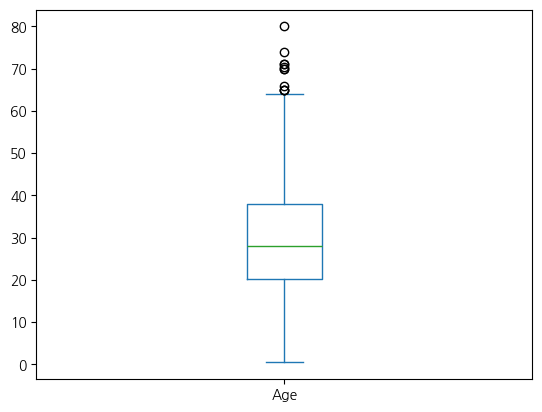

In [30]:
df["Age"].plot.box()    #이상치 없음음

#### Sibsp

In [31]:
sibsp = df["SibSp"].value_counts();
sibsp

## 8명이 있음!!!!!

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

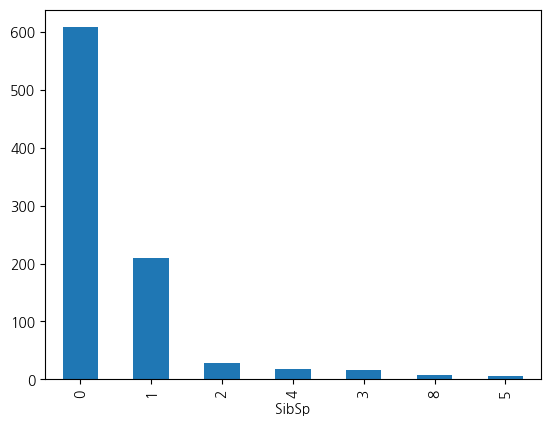

In [32]:
sibsp.plot.bar()

In [33]:
sibsp_n = df["SibSp"].value_counts(normalize=True); sibsp_n

SibSp
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: proportion, dtype: float64

#### Parch

In [34]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

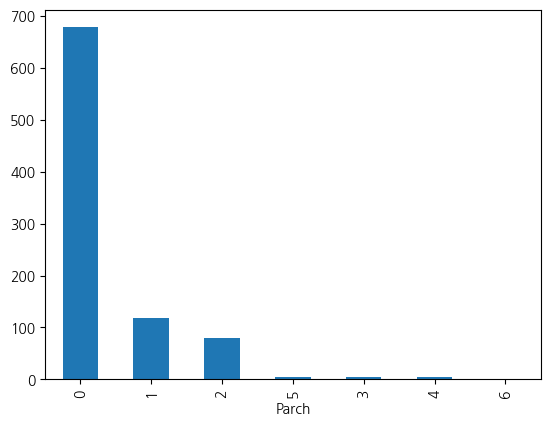

In [35]:
df["Parch"].value_counts().plot.bar()

#### Ticket

In [36]:
df["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [37]:
df["Ticket"].nunique()

681

In [38]:
df["Ticket"].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

#### Fare

In [39]:
df["Fare"].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [40]:
Fare1 = df["Fare"].value_counts(); Fare1

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

In [41]:
Fare1 = pd.DataFrame(Fare1)
Fare1 = Fare1.sort_values(by='Fare')
Fare1.head(4)

,count
Fare,
0.0000,15
4.0125,1
5.0000,1
6.2375,1


<Axes: xlabel='Fare'>

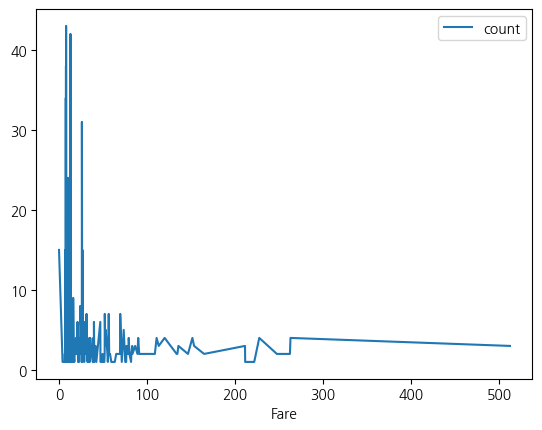

In [42]:
Fare1.plot()
# 주로 100 이하에 분포함 

<Axes: >

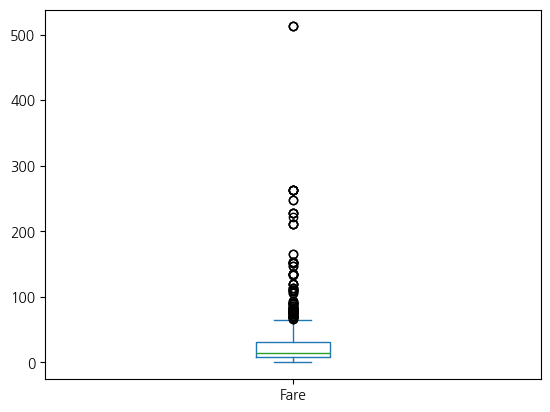

In [43]:
df["Fare"].plot.box()  #이상치 발견!!!

#### Cabin

In [44]:
df["Cabin"].isnull().sum()

687

In [45]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [46]:
df["Cabin"].nunique()

147

In [47]:
df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

#### Embarked

In [48]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [49]:
embarked = df["Embarked"].value_counts(); embarked

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

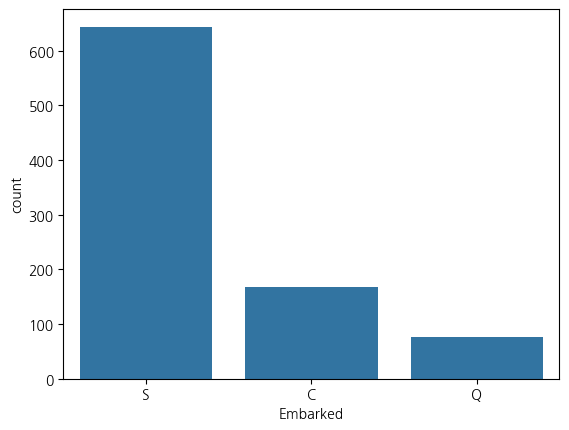

In [50]:
sns.countplot(data= df, x='Embarked')

### 변수 간의 관계

In [51]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

passengerId와 Name은 분석에서 제외

#### survived와 pclass의 관계

<Axes: xlabel='Pclass', ylabel='count'>

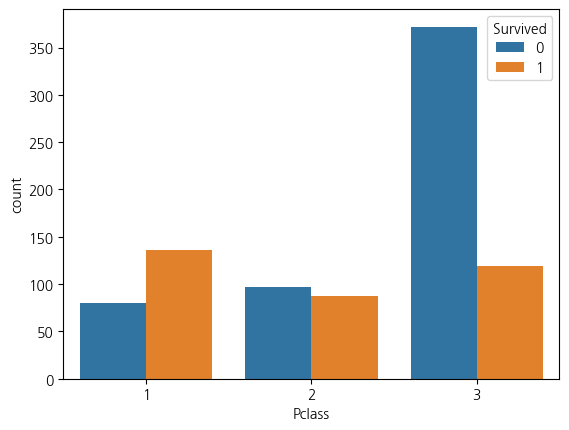

In [56]:
sns.countplot(data = df, x="Pclass", hue="Survived")
# 생존자의 인원수는 Pclass에 따른 큰 차이가 없지만 희생자의 인원 Pclass가 3일 때 훨씬 많다.

#### survived와 sex의 관계

<Axes: xlabel='Survived', ylabel='count'>

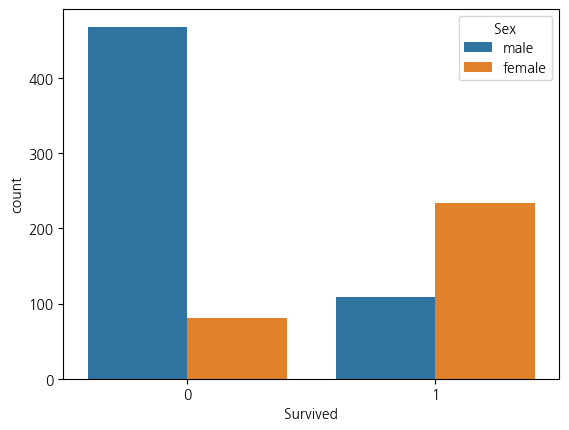

In [ ]:
sns.countplot(data = df, x="Survived", hue="Sex")
# 희생된 남자가 제일 많고 살아남은 여자가 그 다음으로 많았다.

#### survived와 Age의 관계

<Axes: xlabel='Survived', ylabel='Age'>

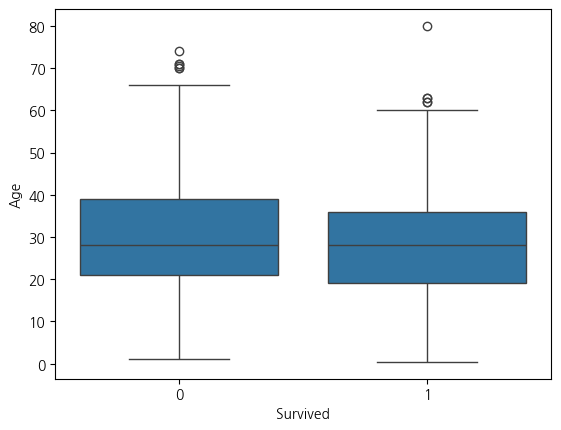

In [61]:
sns.boxplot(data=df, x="Survived", y="Age")

<Axes: xlabel='Survived', ylabel='Age'>

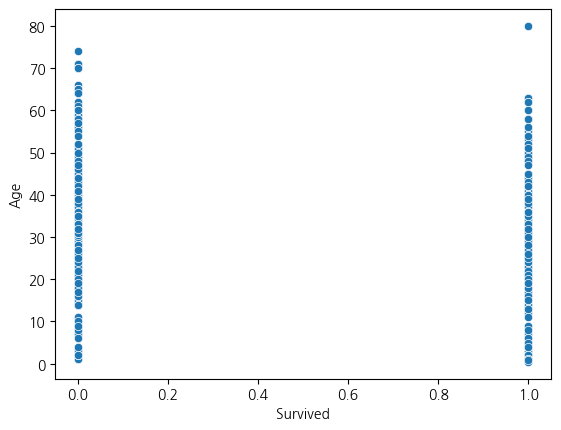

In [62]:
sns.scatterplot(data=df, x="Survived", y="Age")
#생존유무와 나이는 큰 관계가 없어보인다.

#### survived와 Sibsp의 관계

<Axes: xlabel='SibSp', ylabel='count'>

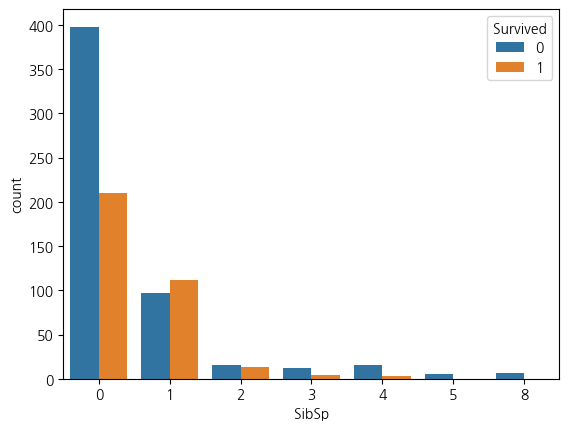

In [69]:
sns.countplot(data = df, x="SibSp", hue="Survived")

#### survived와 Parch의 관계

<Axes: xlabel='Parch', ylabel='count'>

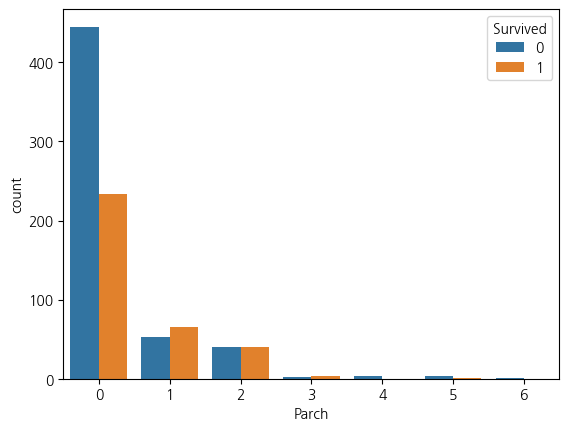

In [73]:
sns.countplot(data = df, x="Parch", hue="Survived")

#### survived와 Fare의 관계

<Axes: xlabel='Survived', ylabel='Fare'>

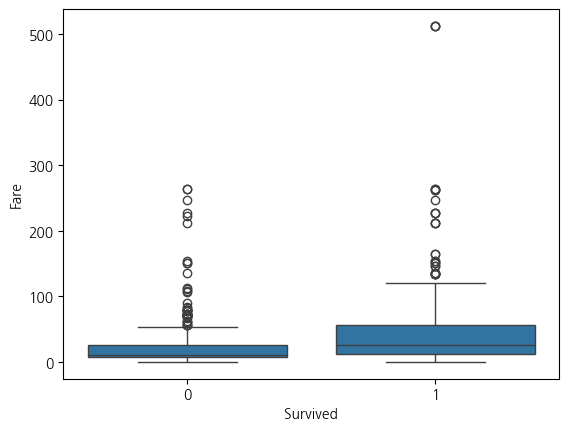

In [75]:
sns.boxplot(data=df, x="Survived", y="Fare")

<Axes: xlabel='Survived', ylabel='Fare'>

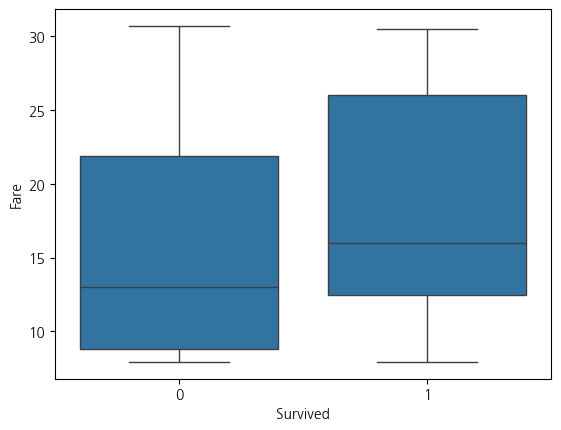

In [90]:
#IQR 내의 데이터만으로 plot 그리기
q1 = df["Fare"].quantile(0.25)
q3 = df["Fare"].quantile(0.75)

tmp_fare = df[((df["Fare"] > q1) & (df["Fare"] < q3))]
# tmp_fare
sns.boxplot(x=df["Survived"], y=tmp_fare["Fare"])

<Axes: xlabel='Survived', ylabel='Fare'>

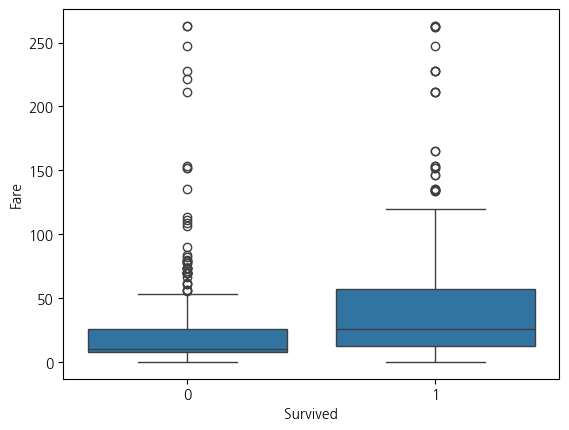

In [ ]:
# Fare < 300 인 데이터로 그린 플랏 

tmp_fare2 = df[(df["Fare"] < 300)]
# tmp_fare
sns.boxplot(x=df["Survived"], y=tmp_fare2["Fare"])

#### survived와 Embarked의 관계

<Axes: xlabel='Embarked', ylabel='count'>

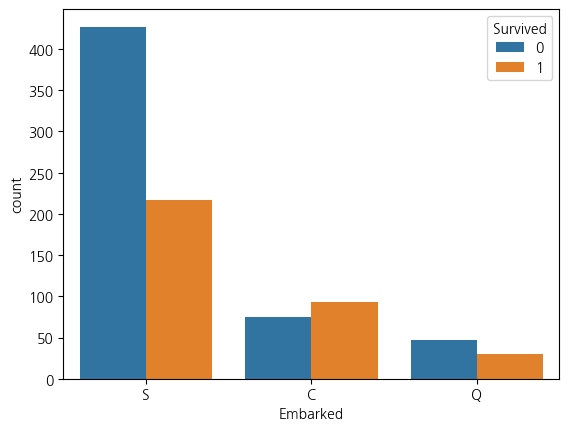

In [94]:
sns.countplot(data = df, x="Embarked", hue="Survived")
# 생존자 : S > C > Q

### 기타 

<Axes: xlabel='Fare', ylabel='Age'>

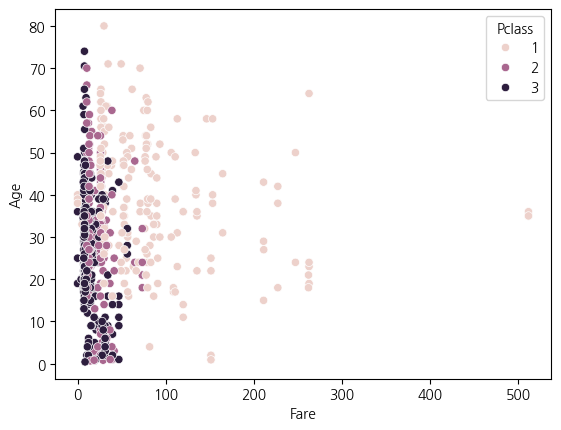

In [98]:
sns.scatterplot(data = df, x="Fare", y="Age", hue = "Pclass")

<Axes: xlabel='Fare', ylabel='Age'>

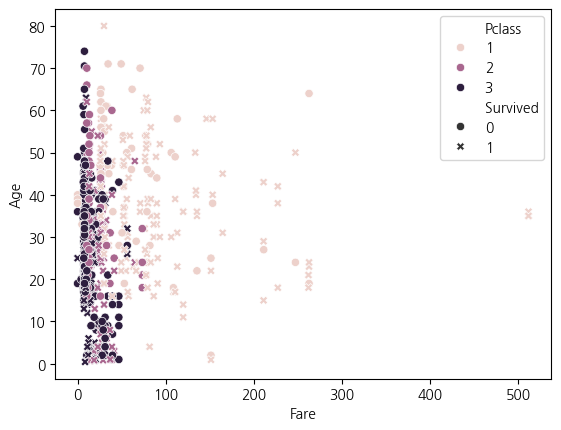

In [103]:
sns.scatterplot(data=df, x="Fare", y="Age", style="Survived", hue="Pclass")